In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# if __name__ == "__main__":

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from yellowbrick.model_selection import FeatureImportances
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
import utils_exploratory as ue
import utils_modelling as um

In [9]:
df_present = ue.df_csv("air_system_present_year.csv" )

In [10]:
df_previous = ue.exchange_dtypes_NaN(df_present)

Coluna class não pôde ser convertida para float64.

DataFrame após a conversão:
      class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg      60     0.0  2.000000e+01    12.0     0.0     0.0     0.0   
1       neg      82     0.0  6.800000e+01    40.0     0.0     0.0     0.0   
2       neg   66002     2.0  2.120000e+02   112.0     0.0     0.0     0.0   
3       neg   59816     NaN  1.010000e+03   936.0     0.0     0.0     0.0   
4       neg    1814     NaN  1.560000e+02   140.0     0.0     0.0     0.0   
...     ...     ...     ...           ...     ...     ...     ...     ...   
15995   neg   81852     NaN  2.130706e+09   892.0     0.0     0.0     0.0   
15996   neg      18     0.0  5.200000e+01    46.0     8.0    26.0     0.0   
15997   neg   79636     NaN  1.670000e+03  1518.0     0.0     0.0     0.0   
15998   neg     110     NaN  3.600000e+01    32.0     0.0     0.0     0.0   
15999   neg       8     0.0  6.000000e+00     4.0     2.0     2.0     0.0

In [11]:
df_previous = ue.classe_boll_1(df_previous)
df_previous = ue.classe_boll_0(df_previous)

In [12]:
df_previous_cleaned = um.remove_NaN(df_previous, 0.75)

Vamos preencher os dados de 3 maneiras diferentes e criar 3 dfs diferentes

In [13]:
df_previous_LR = um.fill_LR(df_previous_cleaned)
df_previous_mean = um.fill_mean(df_previous_cleaned)
df_previous_KNN = um.fill_KNN(df_previous_cleaned)

Vamos reduzir a dimensionalidade dos dataframes e depois fazer um processo iterativo de redução para contrastar os resultados

In [15]:
df_previous_LR_PCA = um.apply_pca(df_previous_LR, 20)

df_previous_mean_PCA = um.apply_pca(df_previous_mean, 20)

df_previous_KNN_PCA = um.apply_pca(df_previous_KNN, 20)

-------------------------------------------------------------------------------------------------
LR

In [16]:
modelLR = um.loading_model("modelLR.joblib")

In [17]:
X_test, y_test = um.test(df_previous_LR_PCA)

report= um.fit_model_analisys_test(modelLR, X_test, y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15625
           1       0.97      0.84      0.90       375

    accuracy                           1.00     16000
   macro avg       0.98      0.92      0.95     16000
weighted avg       1.00      1.00      1.00     16000



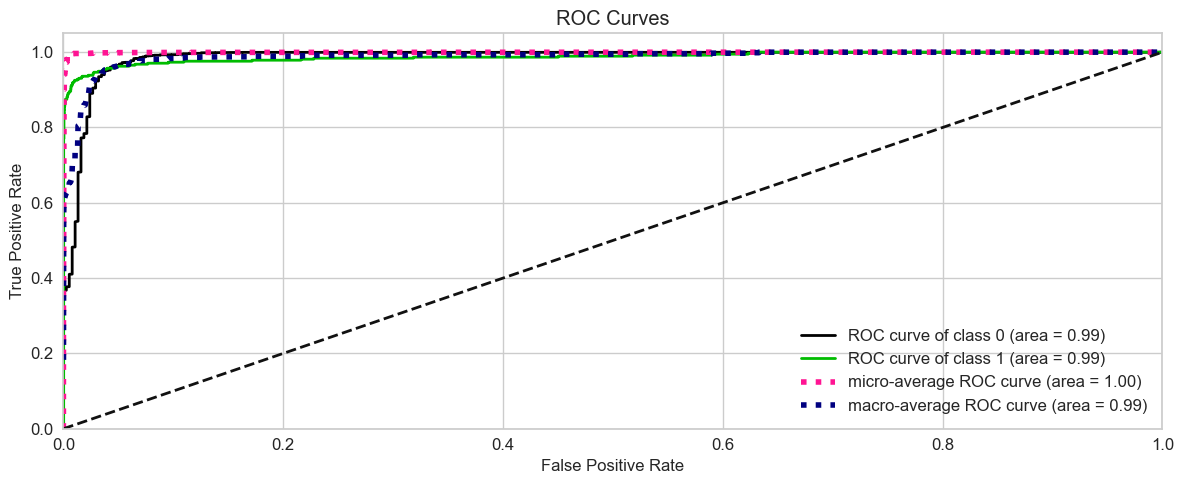

None


In [18]:
um.plt_roc_curve(modelLR, X_test, y_test)

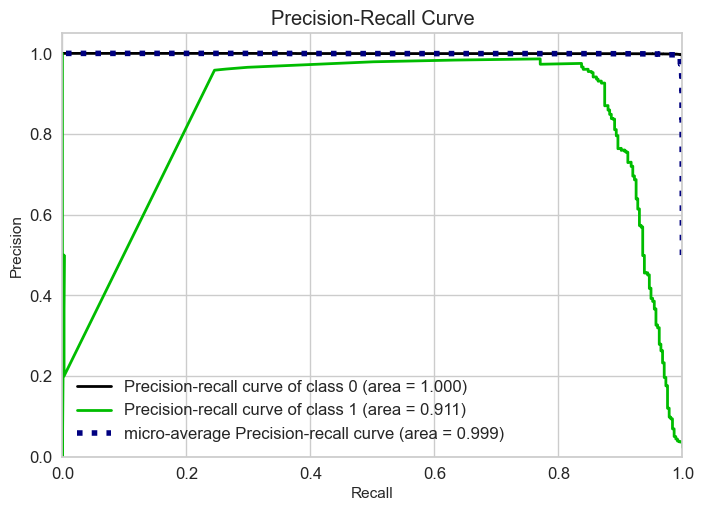

None


In [19]:
um.plt_precision_recall_curve_plot(modelLR, X_test, y_test)

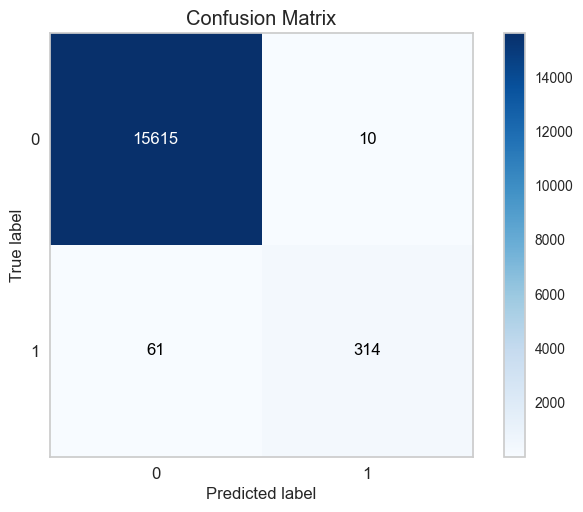

None


In [20]:
um.plot_confusion_matrix_plot(modelLR, X_test, y_test)

-----------------------------------------------------------------------------------------------------------------------------

MEAN

In [21]:
modelMEAN = um.loading_model("modelMEAN.joblib")

In [22]:
X_test, y_test = um.test(df_previous_mean_PCA)

report = um.fit_model_analisys_test(modelMEAN, X_test, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     15625
           1       0.32      0.17      0.22       375

    accuracy                           0.97     16000
   macro avg       0.65      0.58      0.60     16000
weighted avg       0.96      0.97      0.97     16000



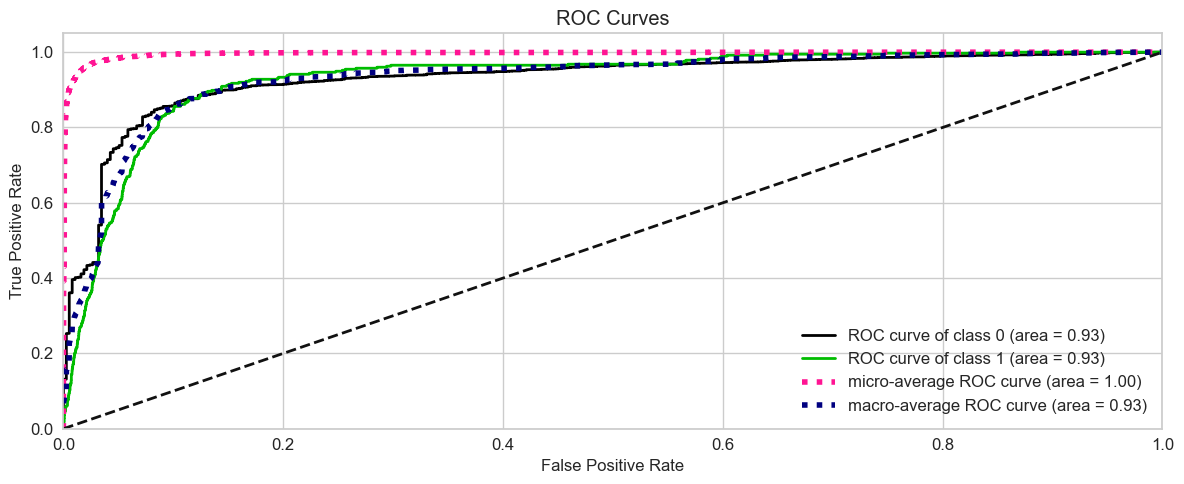

None


In [23]:
um.plt_roc_curve(modelMEAN, X_test, y_test)

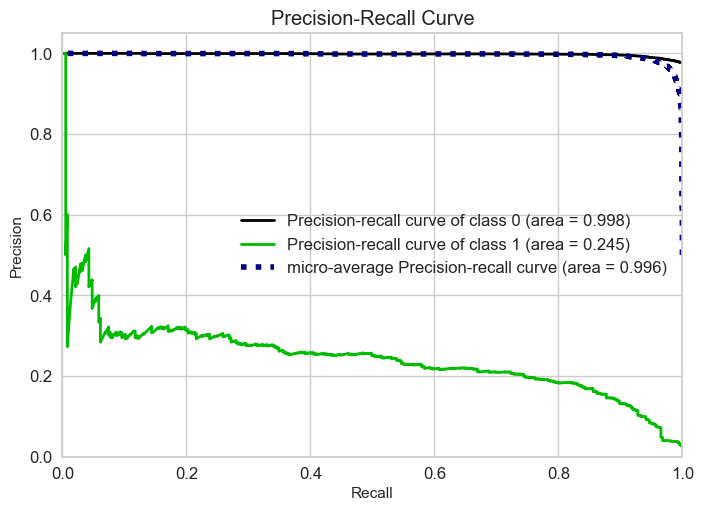

None


In [24]:
um.plt_precision_recall_curve_plot(modelMEAN, X_test, y_test)

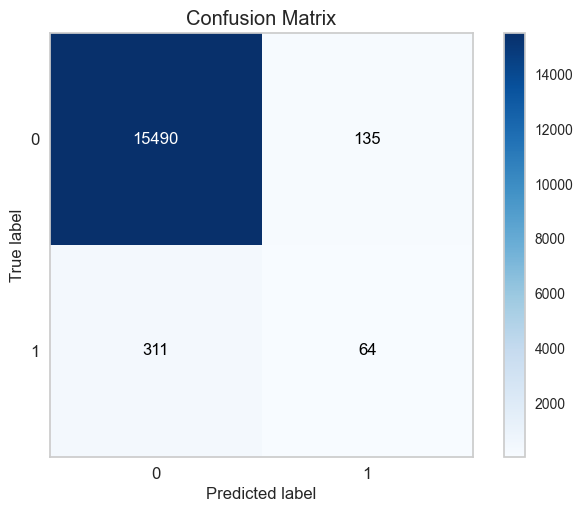

None


In [25]:
um.plot_confusion_matrix_plot(modelMEAN, X_test, y_test)

-----------------------------------------------------------------------------------------------------------------------------------------

KNN

In [26]:
modelKNN = um.loading_model("modelKNN.joblib")

In [27]:
X_test, y_test = um.test(df_previous_KNN_PCA)

report = um.fit_model_analisys_test(modelKNN, X_test, y_test)
print(report)

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     15625
         1.0       0.47      0.17      0.25       375

    accuracy                           0.98     16000
   macro avg       0.73      0.58      0.62     16000
weighted avg       0.97      0.98      0.97     16000



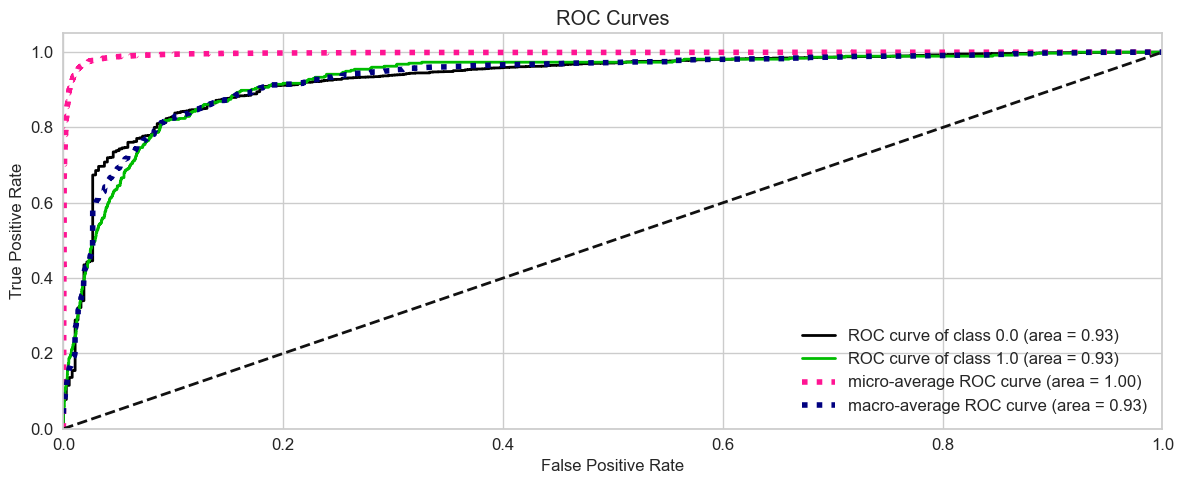

None


In [28]:
um.plt_roc_curve(modelKNN, X_test, y_test)

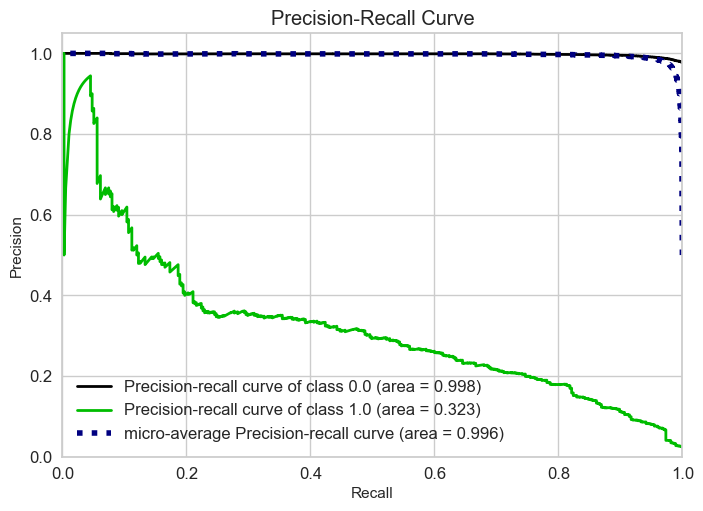

None


In [29]:
um.plt_precision_recall_curve_plot(modelKNN, X_test, y_test)

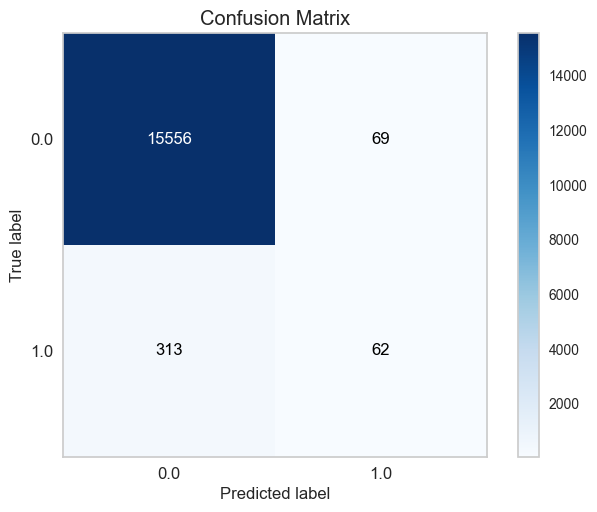

None


In [30]:
um.plot_confusion_matrix_plot(modelKNN, X_test, y_test)

Não sera efetuado hipertunning por falta de tempo e resultados satisfatorios 